<a href="https://colab.research.google.com/github/Gabi-galv/Data-science-II/blob/main/Adicci%C3%B3n_al_m%C3%B3vil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Nivel de adicción al móvil en jóvenes

##2. Configuración del entorno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

##Preguntas de interés

Qué tiempo pasan los jóvenes en pantalla según edad?

Qué uso le dan al móvil?

Consumen más redes sociales, video juegos o contenido educativo?

Qué red social es la que más usan?

cómo les afecta a nivel emocional?

Cómo les afecta a nivel académico?






##3. Carga del Dataset

In [ ]:
url = 'https://github.com/Gabi-galv/Data-science-II/raw/main/teen_phone_addiction_dataset.csv'
df = pd.read_csv(url)

##4. Data wrangling

In [ ]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Time_on_Facebook,Time_on_X,Time_on_Instagram,Time_on_TikTok,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,0.9,0.9,1.6,3.5,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,1.0,1.0,2.4,0.3,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.7,0.3,2.7,1.8,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,0.9,0.1,3.0,1.8,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,0.1,0.4,0.1,0.4,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
print('Información del DataSet')
df.info()

Información del DataSet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control

In [ ]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,...,Apps_Used_Daily,Time_on_Facebook,Time_on_X,Time_on_Instagram,Time_on_TikTok,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,...,12.609333,0.500367,0.500667,1.496467,2.010300,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,...,4.611486,0.313320,0.318057,0.890950,1.185478,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,...,9.000000,0.200000,0.200000,0.700000,1.000000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,...,13.000000,0.500000,0.500000,1.500000,2.000000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,...,17.000000,0.800000,0.800000,2.300000,3.000000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,...,20.000000,1.000000,1.000000,3.000000,4.000000,4.000000,3.000000,10.000000,14.000000,10.000000


##4. Análisis Exploratorio de Datos (EDA)

Revisar valores faltantes

In [ ]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("\nNo hay valores faltantes en el dataset.")

Valores faltantes por columna:
Series([], dtype: int64)

No hay valores faltantes en el dataset.


Exploración de valores promedio por columna

In [ ]:
average_values = df.mean(numeric_only=True)
print("Valores promedio por columna:")
print(average_values)

Valores promedio por columna:
ID                        1500.500000
Age                         15.969667
Daily_Usage_Hours            5.020667
Sleep_Hours                  6.489767
Academic_Performance        74.947333
Social_Interactions          5.097667
Exercise_Hours               1.040667
Anxiety_Level                5.590000
Depression_Level             5.460333
Self_Esteem                  5.546333
Parental_Control             0.507333
Screen_Time_Before_Bed       1.006733
Phone_Checks_Per_Day        83.093000
Apps_Used_Daily             12.609333
Time_on_Facebook             0.500367
Time_on_X                    0.500667
Time_on_Instagram            1.496467
Time_on_TikTok               2.010300
Time_on_Gaming               1.525267
Time_on_Education            1.016333
Family_Communication         5.459667
Weekend_Usage_Hours          6.015100
Addiction_Level              8.881900
dtype: float64


Visualización de la distribución cantidad de datos por edades

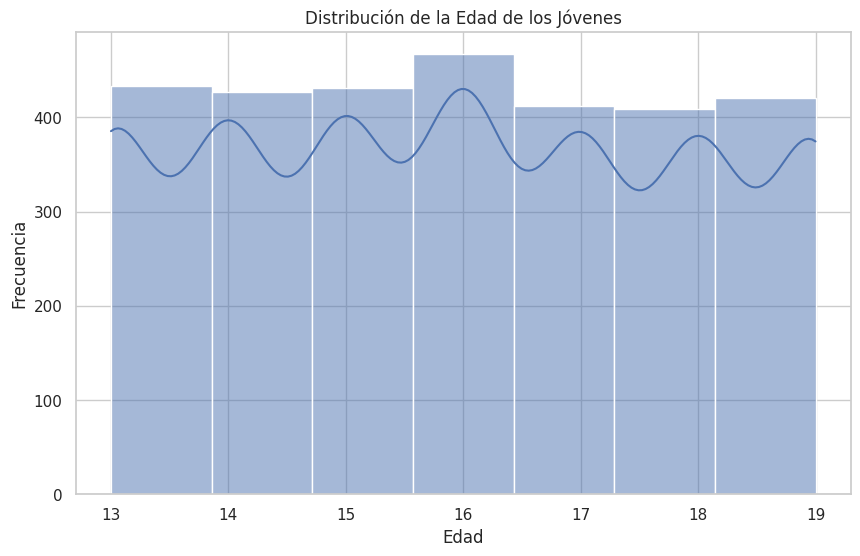

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=df['Age'].nunique(), kde=True)
plt.title('Distribución de la Edad de los Jóvenes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Ingeniería de atributos

- Creación de variables

In [ ]:
df['Time_on_Social_Media'] = df['Time_on_Facebook'] + df['Time_on_X'] + df['Time_on_Instagram'] + df['Time_on_TikTok']
print("Columna 'Time_on_Social_Media'")
print(df[['Time_on_Facebook', 'Time_on_X', 'Time_on_Instagram', 'Time_on_TikTok', 'Time_on_Social_Media']].head())

Columna 'Time_on_Social_Media'
   Time_on_Facebook  Time_on_X  Time_on_Instagram  Time_on_TikTok  \
0               0.9        0.9                1.6             3.5   
1               1.0        1.0                2.4             0.3   
2               0.7        0.3                2.7             1.8   
3               0.9        0.1                3.0             1.8   
4               0.1        0.4                0.1             0.4   

   Time_on_Social_Media  
0                   6.9  
1                   4.7  
2                   5.5  
3                   5.8  
4                   1.0  


Qué tiempo pasan los jóvenes en pantalla según edad?

/tmp/ipython-input-1295566619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=average_daily_usage_by_age, x='Age', y='Daily_Usage_Hours', palette='viridis')


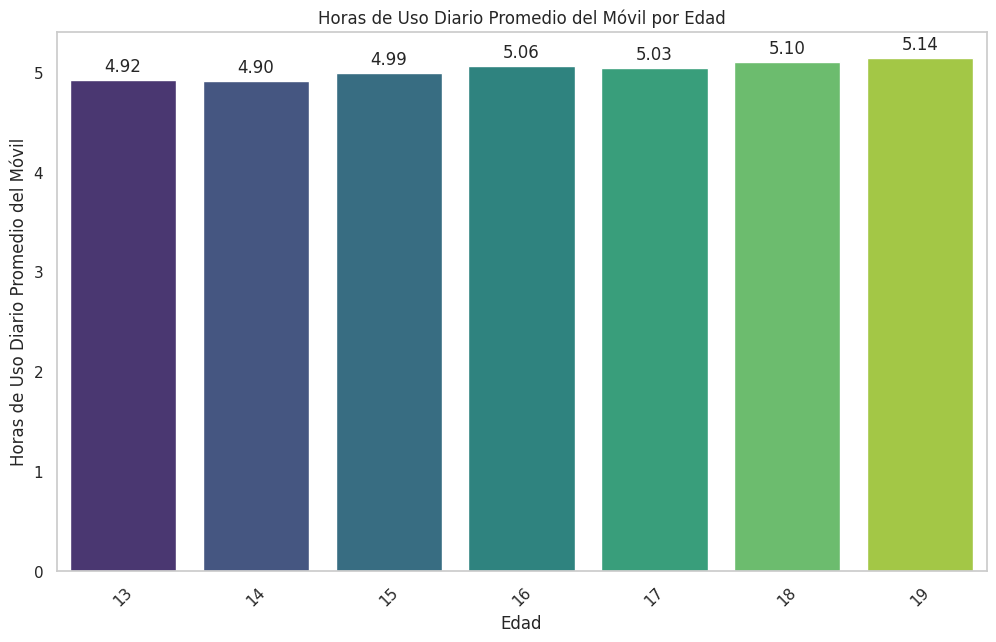

In [ ]:
# Calcular el promedio de uso diario por edad
average_daily_usage_by_age = df.groupby('Age')['Daily_Usage_Hours'].mean().reset_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=average_daily_usage_by_age, x='Age', y='Daily_Usage_Hours', palette='viridis')
plt.title('Horas de Uso Diario Promedio del Móvil por Edad')
plt.xlabel('Edad')
plt.ylabel('Horas de Uso Diario Promedio del Móvil')
plt.xticks(rotation=45) # Rotar etiquetas para mejor legibilidad si hay muchas edades
plt.grid(axis='y')

# Agregar etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Qué uso le dan al móvil?  

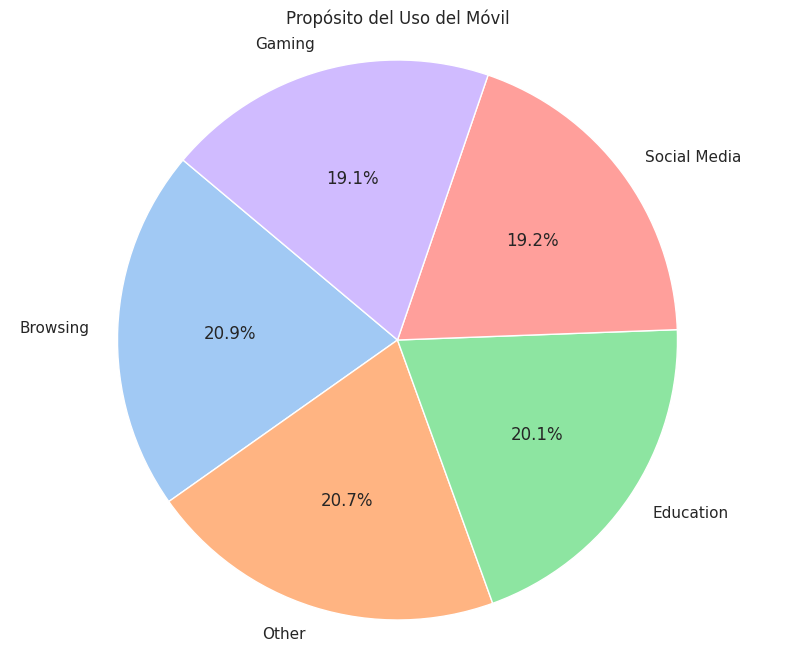

In [ ]:
purpose_counts = df['Phone_Usage_Purpose'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Propósito del Uso del Móvil')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Consumen más redes sociales, video juegos o contenido educativo?

/tmp/ipython-input-3346823847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=time_melted, x='Categoría de Uso', y='Horas de Uso', palette='pastel')


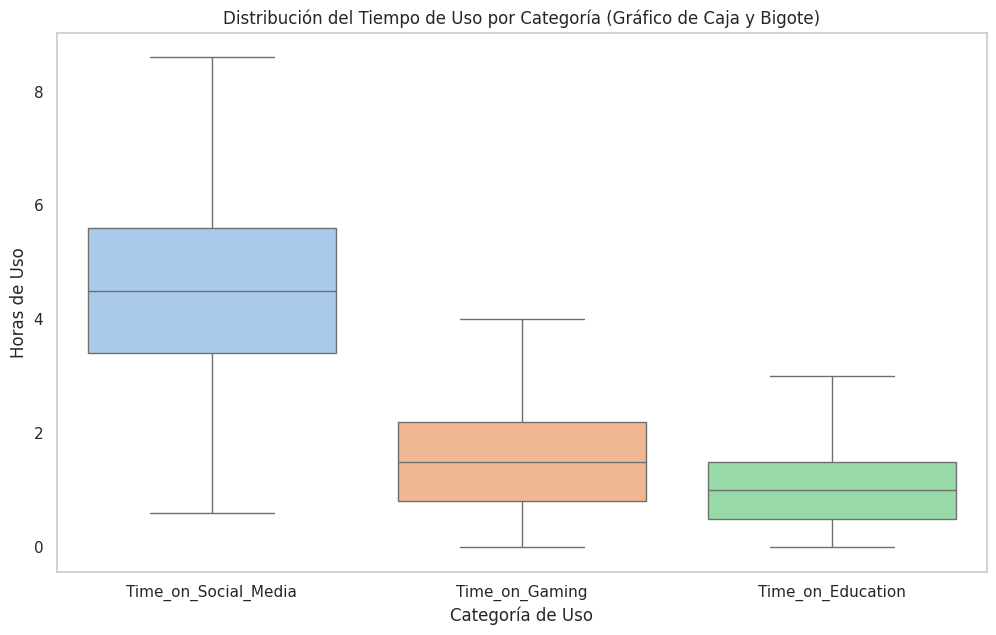

In [ ]:
time_columns = ['Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
time_data = df[time_columns]

# Melt the DataFrame to long format for easier plotting with seaborn
time_melted = time_data.melt(var_name='Categoría de Uso', value_name='Horas de Uso')

plt.figure(figsize=(12, 7))
sns.boxplot(data=time_melted, x='Categoría de Uso', y='Horas de Uso', palette='pastel')
plt.title('Distribución del Tiempo de Uso por Categoría (Gráfico de Caja y Bigote)')
plt.xlabel('Categoría de Uso')
plt.ylabel('Horas de Uso')
plt.grid(axis='y')
plt.show()

Qué red social es la que más usan?

/tmp/ipython-input-2325588974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_time_on_social_media, x='Red Social', y='Horas de Uso Promedio', palette='coolwarm')


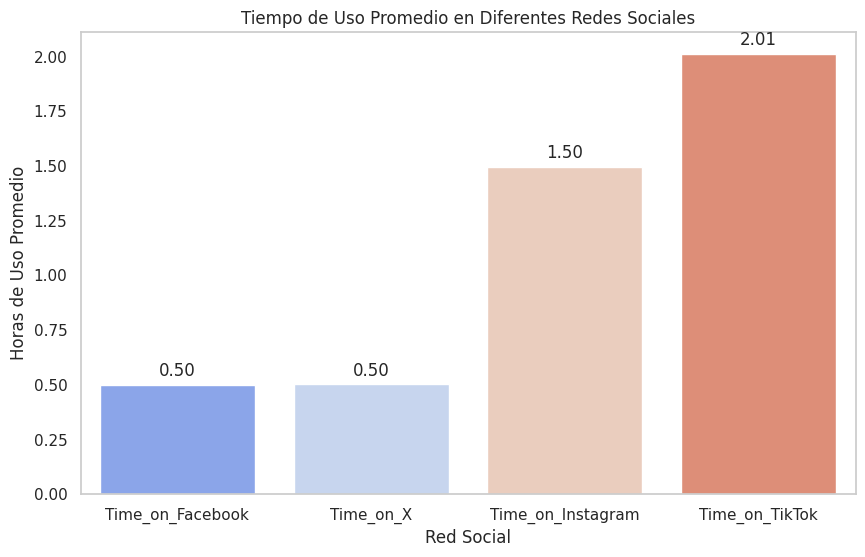

In [ ]:
social_media_columns = ['Time_on_Facebook', 'Time_on_X', 'Time_on_Instagram', 'Time_on_TikTok']
average_time_on_social_media = df[social_media_columns].mean().reset_index()
average_time_on_social_media.columns = ['Red Social', 'Horas de Uso Promedio']

plt.figure(figsize=(10, 6))
sns.barplot(data=average_time_on_social_media, x='Red Social', y='Horas de Uso Promedio', palette='coolwarm')
plt.title('Tiempo de Uso Promedio en Diferentes Redes Sociales')
plt.xlabel('Red Social')
plt.ylabel('Horas de Uso Promedio')
plt.grid(axis='y')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')
plt.show()

cómo les afecta a nivel emocional?

/tmp/ipython-input-873732617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=emotional_melted, x='Aspecto Emocional', y='Nivel', palette='viridis')


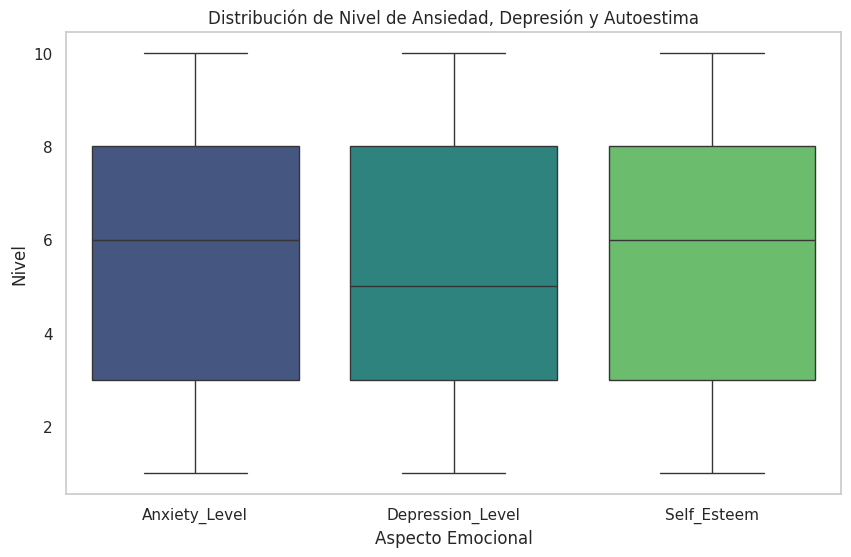

In [ ]:
emotional_columns = ['Anxiety_Level', 'Depression_Level', 'Self_Esteem']
emotional_data = df[emotional_columns]

emotional_melted = emotional_data.melt(var_name='Aspecto Emocional', value_name='Nivel')

plt.figure(figsize=(10, 6))
sns.boxplot(data=emotional_melted, x='Aspecto Emocional', y='Nivel', palette='viridis')
plt.title('Distribución de Nivel de Ansiedad, Depresión y Autoestima')
plt.xlabel('Aspecto Emocional')
plt.ylabel('Nivel')
plt.grid(axis='y')
plt.show()

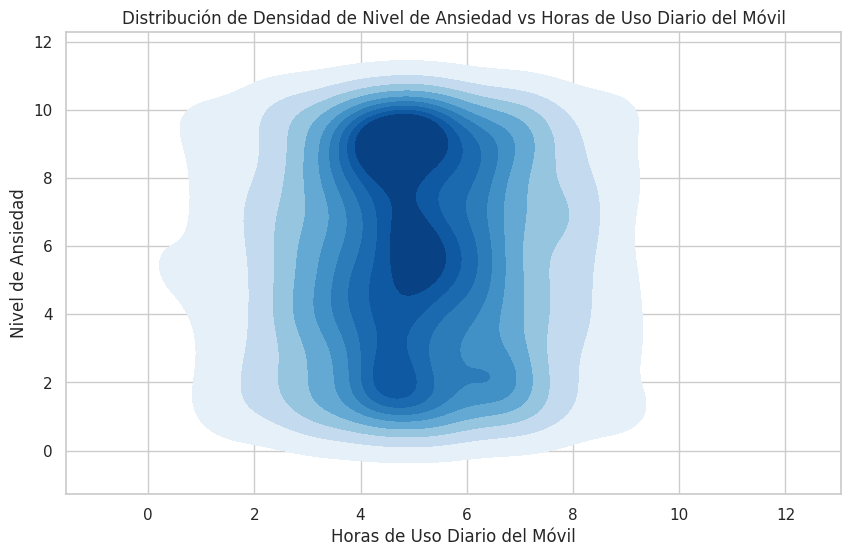

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Daily_Usage_Hours', y='Anxiety_Level', cmap='Blues', fill=True)
plt.title('Distribución de Densidad de Nivel de Ansiedad vs Horas de Uso Diario del Móvil')
plt.xlabel('Horas de Uso Diario del Móvil')
plt.ylabel('Nivel de Ansiedad')
plt.grid(True)
plt.show()

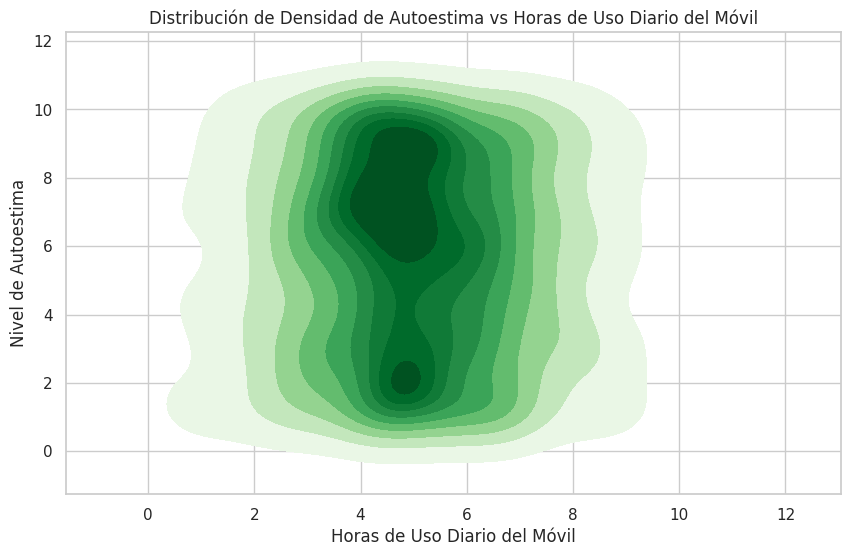

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Daily_Usage_Hours', y='Self_Esteem', cmap='Greens', fill=True)
plt.title('Distribución de Densidad de Autoestima vs Horas de Uso Diario del Móvil')
plt.xlabel('Horas de Uso Diario del Móvil')
plt.ylabel('Nivel de Autoestima')
plt.grid(True)
plt.show()

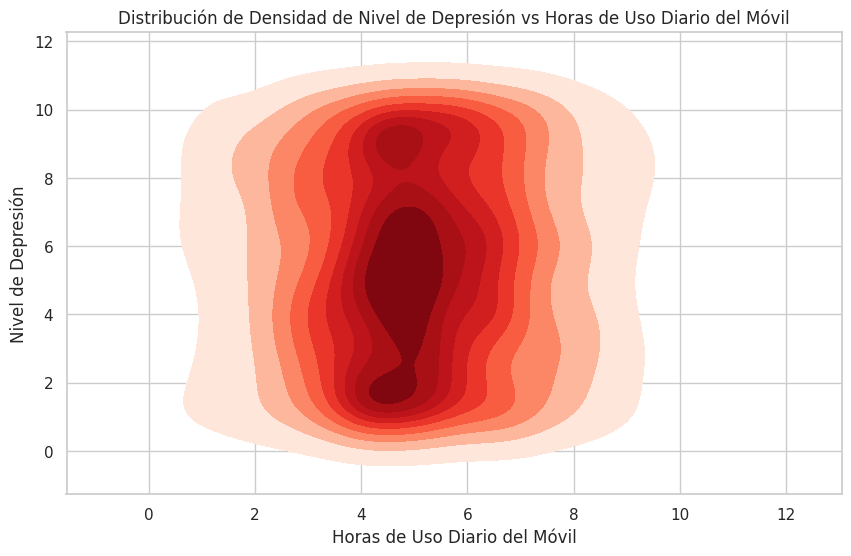

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Daily_Usage_Hours', y='Depression_Level', cmap='Reds', fill=True)
plt.title('Distribución de Densidad de Nivel de Depresión vs Horas de Uso Diario del Móvil')
plt.xlabel('Horas de Uso Diario del Móvil')
plt.ylabel('Nivel de Depresión')
plt.grid(True)
plt.show()

Cómo les afecta a nivel académico?

/tmp/ipython-input-1589914762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Daily_Usage_Category', y='Academic_Performance', palette='coolwarm', order=labels)


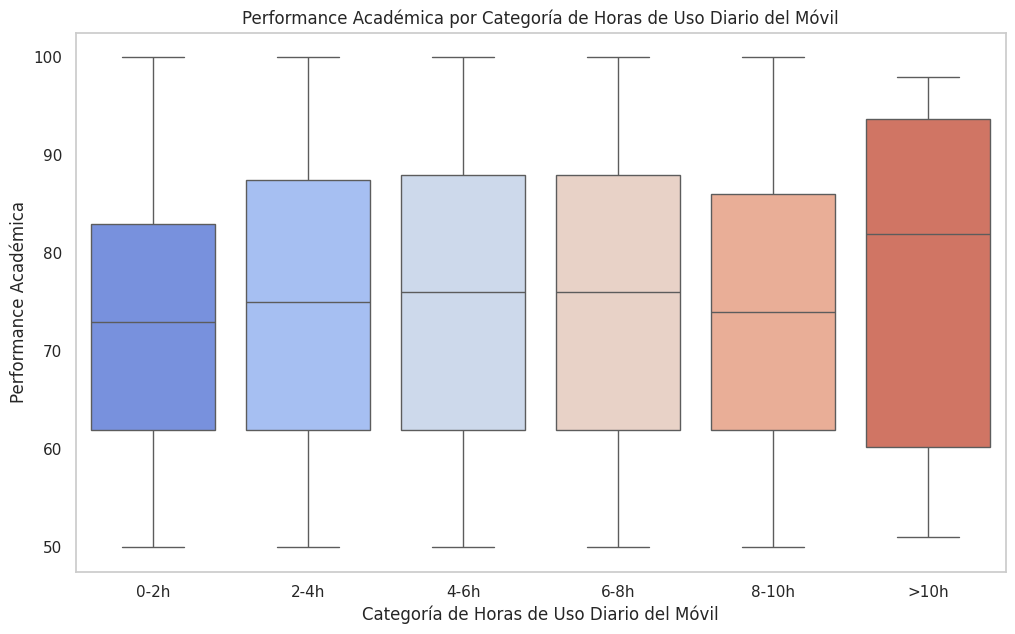

In [ ]:
# Definir los rangos y etiquetas para las 'Horas de Uso Diario del Móvil'
bins = [0, 2, 4, 6, 8, 10, df['Daily_Usage_Hours'].max() + 1]
labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8-10h', '>10h']

df['Daily_Usage_Category'] = pd.cut(df['Daily_Usage_Hours'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Daily_Usage_Category', y='Academic_Performance', palette='coolwarm', order=labels)
plt.title('Performance Académica por Categoría de Horas de Uso Diario del Móvil')
plt.xlabel('Categoría de Horas de Uso Diario del Móvil')
plt.ylabel('Performance Académica')
plt.grid(axis='y')
plt.show()